Load model

In [ ]:
import sys
import os
from pathlib import Path
# notebook_dir = Path(os.getcwd())
project_root = Path("path to the root of the project")
sys.path.append(str(project_root))
sys.path.append(str(project_root / 'notebooks'))


In [2]:
config_path = project_root / 'notebooks/configs/notebook_wm.yaml'

In [3]:
# Import the functions
from load_model import load_model_from_config, load_trainer_from_config, load_config_, load_model_

# Load the model and trainer
config = load_config_(config_path)
config['data']['train']['enabled'] = False
config['test']['test_only'] = True

# No compress
# config['log']['resume'] = '/home/yang/Documents/uwaterloo/experienments/restoration/DASR-SFT/notebooks/checkpoints/test-VUNet-wm-ori_1/model/incomplete/model_9.pt'

# Compress + Contra
config['hardware']['n_GPUs'] = 1
# config['log']['resume'] = str(project_root / 'notebooks/checkpoints/test-VUNet-wm-small_patch/model_56.pt')
# config['log']['resume'] = str(project_root / 'notebooks/checkpoints/test-VUNet-wm-small_patch/no_contra/model_99.pt')
# config['log']['resume'] = str(project_root / 'notebooks/checkpoints/test-VUNet-wm-small_patch/contra/model_83.pt')
config['log']['resume'] = str(project_root / 'checkpoints/wm.pt')
# config['log']['resume'] = str(project_root / 'notebooks/checkpoints/test-VUNet-wm-small_patch-head_tail-cont/model_20.pt')


config['data']['patch_size'] = 128

# Rain's training set
config['data']['test'] = {
    'enabled': True,
    'type': 'Single_Dataset',
    'n_threads': 8,
    'batch_size': 1,
    'crop_size': 224,
    'list_type': 'paired_csv',
    'use_lmdb': True, # False,
    # 'db_basedir': '/home/yang/beluga/home/data/rain/data',
    'db_basedir': '/home/paulyang/data/wm_simulated/data',
    'root': './data',
    # 'csv': './data/rain_train_portion_filelist.csv',
    'csv': '/home/paulyang/data/wm_simulated/test.csv',
    'csv_A_column': 'name',
    'csv_B_column': 'ref_name',
    'csv_path_is_relative': True,
    'suppress_crop': False
}

config['network']['netCprs']['enabled'] = True

model, logger = load_model_(config)

/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/paulyang/experienments/restoration/dasr/DASR-SFT-release/options/default.yaml


In [4]:

trainer = load_trainer_from_config(model, config, logger)

# Now you can interact with the model and trainer
print(model)
print(trainer)

[*] Using lmdb: /home/paulyang/data/wm_simulated/data
[*] Using GT: ref_name
[*] Loading model from checkpoint: /home/paulyang/experienments/restoration/dasr/DASR-SFT-release/checkpoints/wm.pt


/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()

[*] Using degrade loss: dists, weight: 10
[*] Using color loss: rgbn, weight: 10.0
[*] Using loss type: l1, weight: 1
CombinedModel(
  (netG): BasicWrapper(
    (net): VUNet(
      (map_head): Conv2d(
        (activation): ReLU()
        (conv2d): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (conv_first): Conv2d(
        (conv2d): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (blocks1): ModuleList(
        (0-3): 4 x SFTResBlock(
          (sft1): SFTLayer(
            (convs_gamma): ModuleList(
              (0): Conv2d(
                (conv2d): Conv2d(8, 18, kernel_size=(1, 1), stride=(1, 1), bias=False)
              )
              (1): Conv2d(
                (activation): LeakyReLU(negative_slope=0.01)
                (conv2d): Conv2d(18, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              )
            )
            (convs_beta): ModuleList(
              (0): Conv2d(
        

/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403463728/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/paulyang/anacond

In [5]:
# %%writefile utils.py
# %load utils.py

from torchvision import transforms
import torchvision
from PIL import Image

def load_image(image_path):
    # image = Image.open(image_path)
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = transforms.ToTensor()(image)
    # print(image.shape)
    # image = image.float() / 255
    preprocess = transforms.Compose([
        # transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    image = preprocess(image)
    # print(image.max(), image.min())
    return image

def forward_latent_modifiable(y):
    e, _ = model.netE.encoder_q(y)
    e = model.netCprs.forward_modifiable(e)
    return e

def finish_latent(e):
    e = model.netCprs.forward_finish(e)
    return e

def forward_gen(x_0, eg, el):
    eg = finish_latent(eg)
    return model.netG(x_0, eg, el, model.pos_emb)


## Compression settings

In [6]:
COMPRESS_G = True
COMPRESS_L = True

## Calculating Statistics of Latents

In [7]:
model.eval()

egs = []
els = []

for batchi, raw_data in enumerate(trainer.loaders['test']):
    x_0 = raw_data['B_img'].cuda()
    y_0 = raw_data['A_img'][:, 0].cuda()
    y_0_key = raw_data['A_img'][:, 1].cuda()
    # eg = model.forward_latent(y_0, COMPRESS_G)
    eg = forward_latent_modifiable(y_0)
    el = model.forward_latent_local(y_0, COMPRESS_L)
    egs.append(eg.detach().cpu())
    els.append(el.detach().cpu())
    
    del x_0, y_0, y_0_key

    if batchi % 50 == 0: 
        print(batchi)

    if batchi > 1000:
        break


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


Perform analysis on local

In [8]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

egs_np = np.concatenate([eg.numpy() for eg in egs], axis=0)
print(egs_np.shape)

(1002, 256)


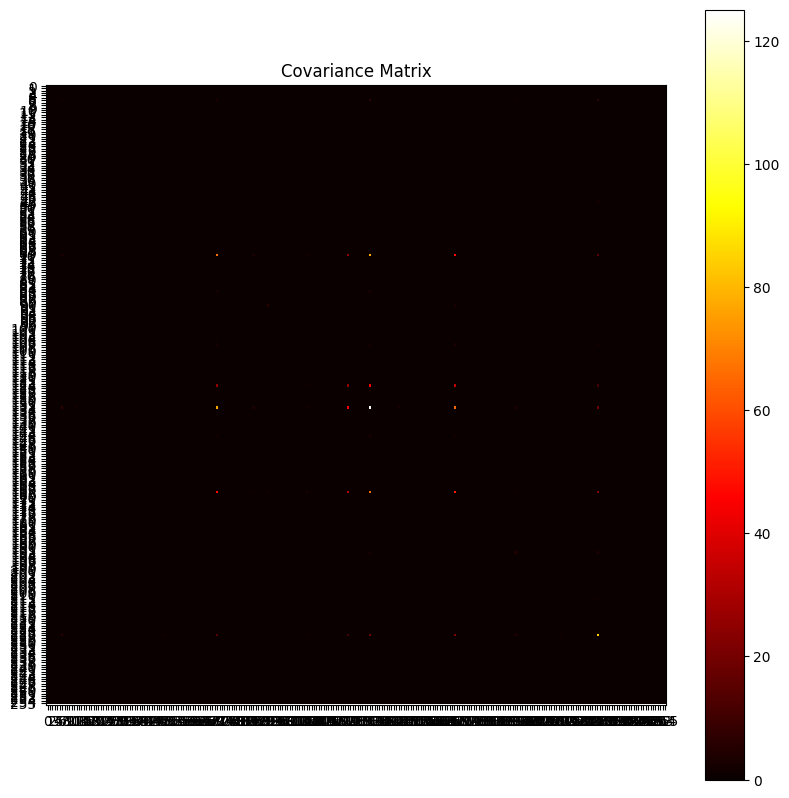

In [9]:
cov_matrix = np.cov(egs_np, rowvar=False)
cov_matrix = cov_matrix / np.std(cov_matrix.flatten())
plt.figure(figsize=(10,10))
plt.imshow(np.abs(cov_matrix), cmap='hot', interpolation='nearest')

num_samples = cov_matrix.shape[0]
plt.xticks(np.arange(0, num_samples, step=1))
plt.yticks(np.arange(0, num_samples, step=1))


plt.colorbar()
plt.title('Covariance Matrix')
plt.show()

In [10]:
vars = np.diag(cov_matrix)

# Find the indices of the sorted values in vars in descending order
sorted_indices = np.argsort(vars)[::-1]

# Print the first 10 entries in 'vars' with the highest values
print("First 10 entries in 'vars' with the highest values:")
for index in sorted_indices[:10]:
    print(f"Index: {index}, Value: {vars[index]}")


First 10 entries in 'vars' with the highest values:
Index: 133, Value: 125.18435992556748
Index: 227, Value: 83.72826572935037
Index: 70, Value: 66.18031117057177
Index: 168, Value: 51.296963957675416
Index: 124, Value: 25.14848215837786
Index: 91, Value: 5.002246041318783
Index: 193, Value: 4.724712525212372
Index: 6, Value: 2.625073617884458
Index: 107, Value: 1.108036081007337
Index: 42, Value: 1.0950352216321533


In [11]:
mean_values = np.mean(egs_np, axis=0)
print("Entries with the highest variance:")
for index in sorted_indices[:10]:
    print(f"Index: {index}, Mean: {mean_values[index]}, Variance: {vars[index]}")


Entries with the highest variance:
Index: 133, Mean: 6.098899841308594, Variance: 125.18435992556748
Index: 227, Mean: 0.4449804425239563, Variance: 83.72826572935037
Index: 70, Mean: -2.9273111820220947, Variance: 66.18031117057177
Index: 168, Mean: 5.879849910736084, Variance: 51.296963957675416
Index: 124, Mean: -4.770468235015869, Variance: 25.14848215837786
Index: 91, Mean: 3.7266383171081543, Variance: 5.002246041318783
Index: 193, Mean: -0.467793732881546, Variance: 4.724712525212372
Index: 6, Mean: 0.25374966859817505, Variance: 2.625073617884458
Index: 107, Mean: 0.31461188197135925, Variance: 1.108036081007337
Index: 42, Mean: -0.7261435389518738, Variance: 1.0950352216321533


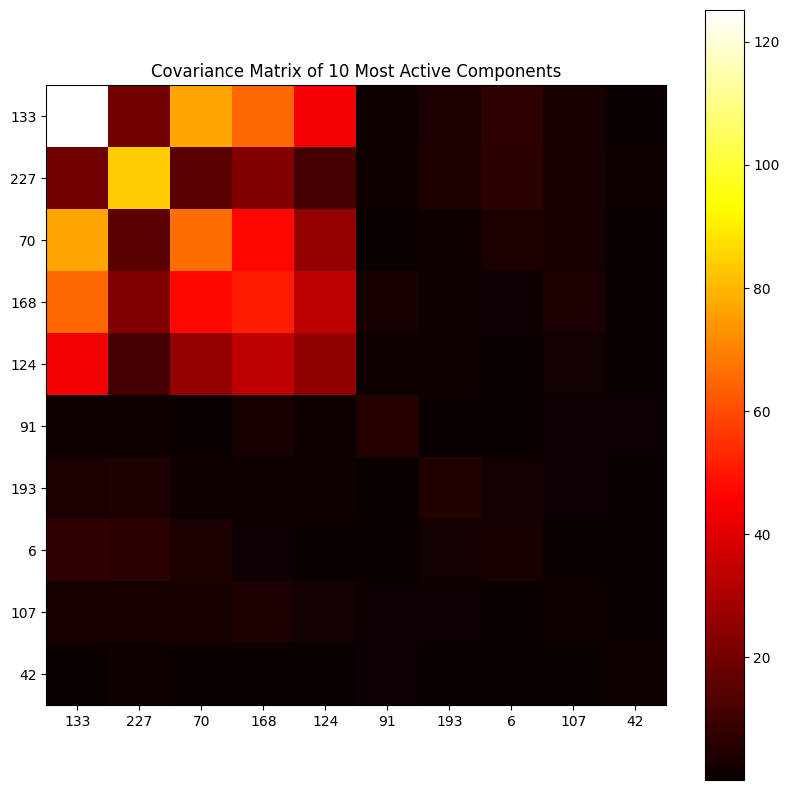

In [12]:
# Extract the covariance matrix of the 10 most active components
active_cov_matrix = cov_matrix[np.ix_(sorted_indices[:10], sorted_indices[:10])]

plt.figure(figsize=(10,10))
plt.imshow(np.abs(active_cov_matrix), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix of 10 Most Active Components')
plt.xticks(np.arange(10), labels=sorted_indices[:10])
plt.yticks(np.arange(10), labels=sorted_indices[:10])
plt.show()


In [13]:
# Get the first image
for batchi, raw_data in enumerate(trainer.loaders['test']):
    if batchi != 555:
        continue
    x_0 = raw_data['B_img'].cuda()
    y_0 = raw_data['A_img'][:, 0].cuda()
    y_0_key = raw_data['A_img'][:, 1].cuda()
    eg = forward_latent_modifiable(y_0) # model.forward_latent(y_0, COMPRESS_G)
    eg_pristine = forward_latent_modifiable(x_0) # model.forward_latent(x_0, COMPRESS_G)
    el = model.forward_latent_local(y_0, COMPRESS_L)
    break




In [14]:
# Save x_0 and y_0 tensors to disk
# torch.save(x_0, 'x_0_tensor.pt')
# torch.save(y_0, 'y_0_tensor.pt')



In [15]:
import torch

x_0 = torch.load(project_root / 'notebooks' / 'x_0_tensor.pt')
y_0 = torch.load(project_root / 'notebooks' / 'y_0_tensor.pt')
eg = forward_latent_modifiable(y_0)
eg_pristine = forward_latent_modifiable(x_0)
el = model.forward_latent_local(y_0, COMPRESS_L)

with torch.no_grad():
    res_img = forward_gen(x_0, eg, el).detach()

/home/paulyang/experienments/restoration/dasr/DASR-SFT-release/model/vunet_conv.py:305: UserWarning: pos_emb is not used in this wrapper.
  warnings.warn("pos_emb is not used in this wrapper.")
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/home/paulyang/anaconda3/envs/torch22compress/lib/py

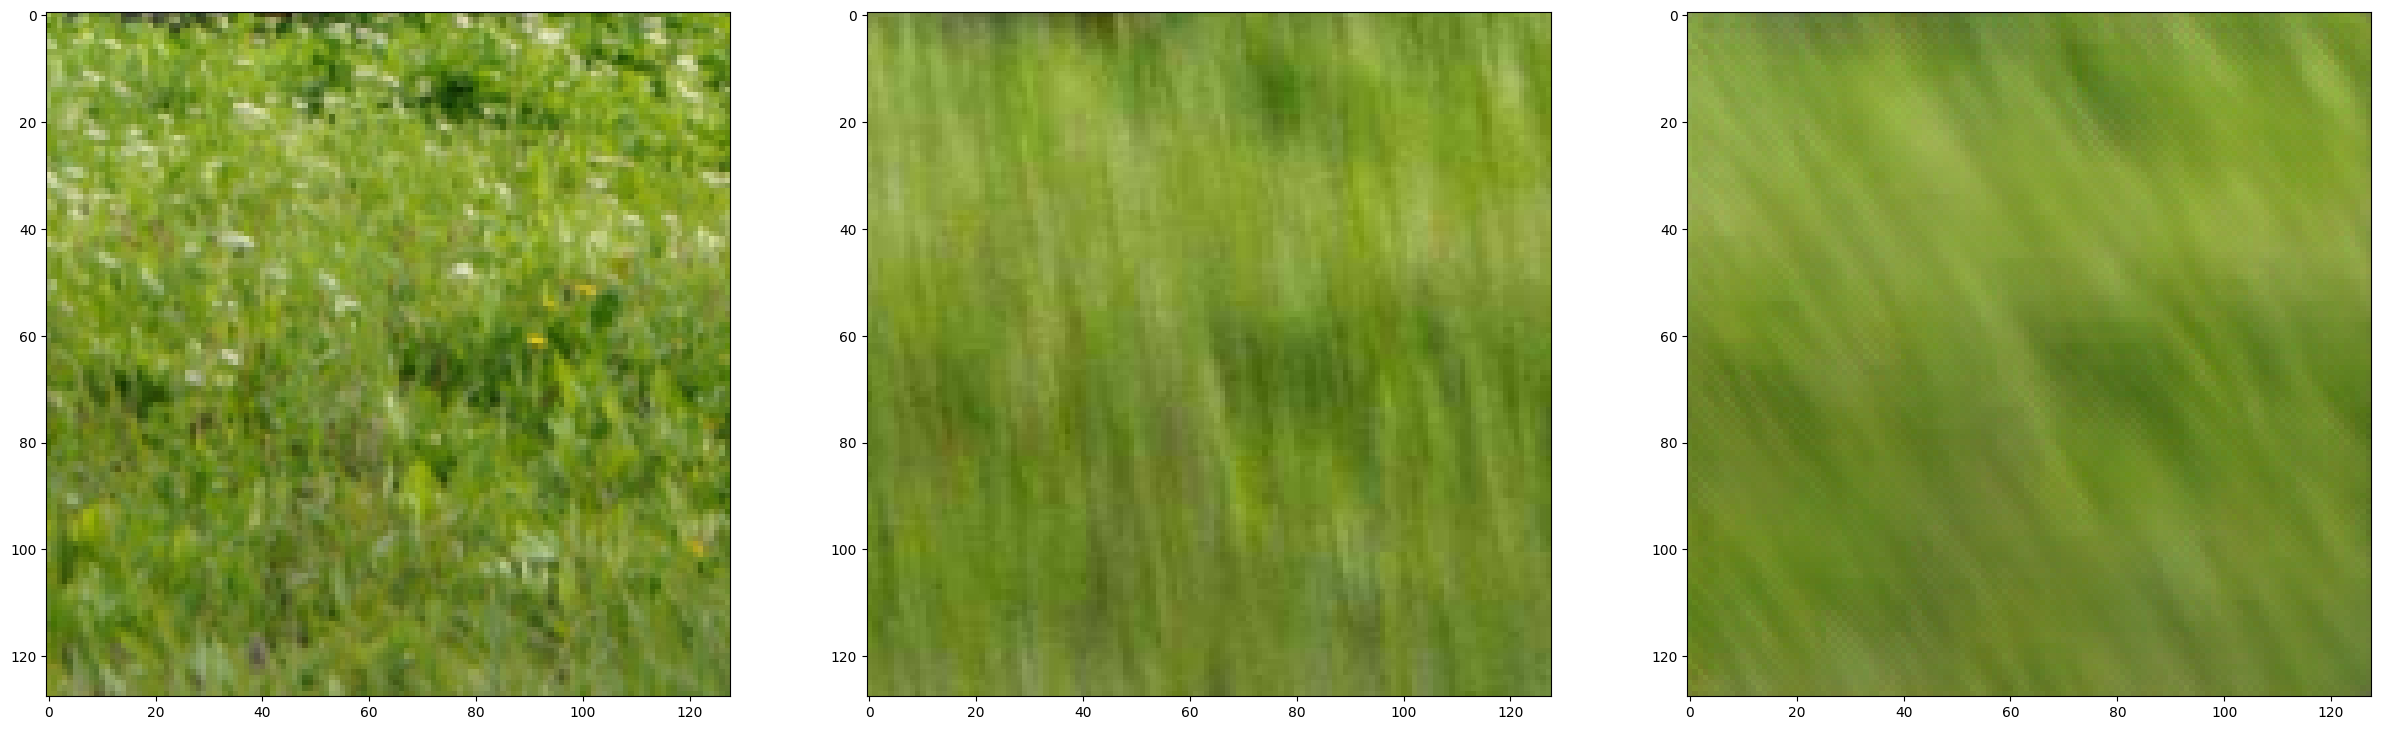

In [16]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(30,10))
axs[0].imshow((x_0.squeeze().permute(1, 2, 0).cpu().numpy() * 0.5) + 0.5)
axs[1].imshow((y_0.squeeze().permute(1, 2, 0).cpu().numpy() * 0.5) + 0.5)
axs[2].imshow((res_img.squeeze().permute(1, 2, 0).cpu().numpy() * 0.5) + 0.5)
plt.show()

In [17]:
import math

In [18]:
print(eg.shape)

torch.Size([1, 256])


In [19]:
from typing import Union

def save_image(img: torch.Tensor, save_path: Union[Path,str]):
    if isinstance(save_path, Path):
        save_path = str(save_path.absolute()) 
    if len(img.shape) == 4:
        img = img.squeeze(0)
    if isinstance(img, torch.Tensor):
        img = img.cpu().detach().numpy()
    img = (img + 1) / 2
    img = img.transpose(1, 2, 0)
    img = (img * 255).clip(0, 255).astype(np.uint8)
    img = Image.fromarray(img)
    img.save(save_path)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

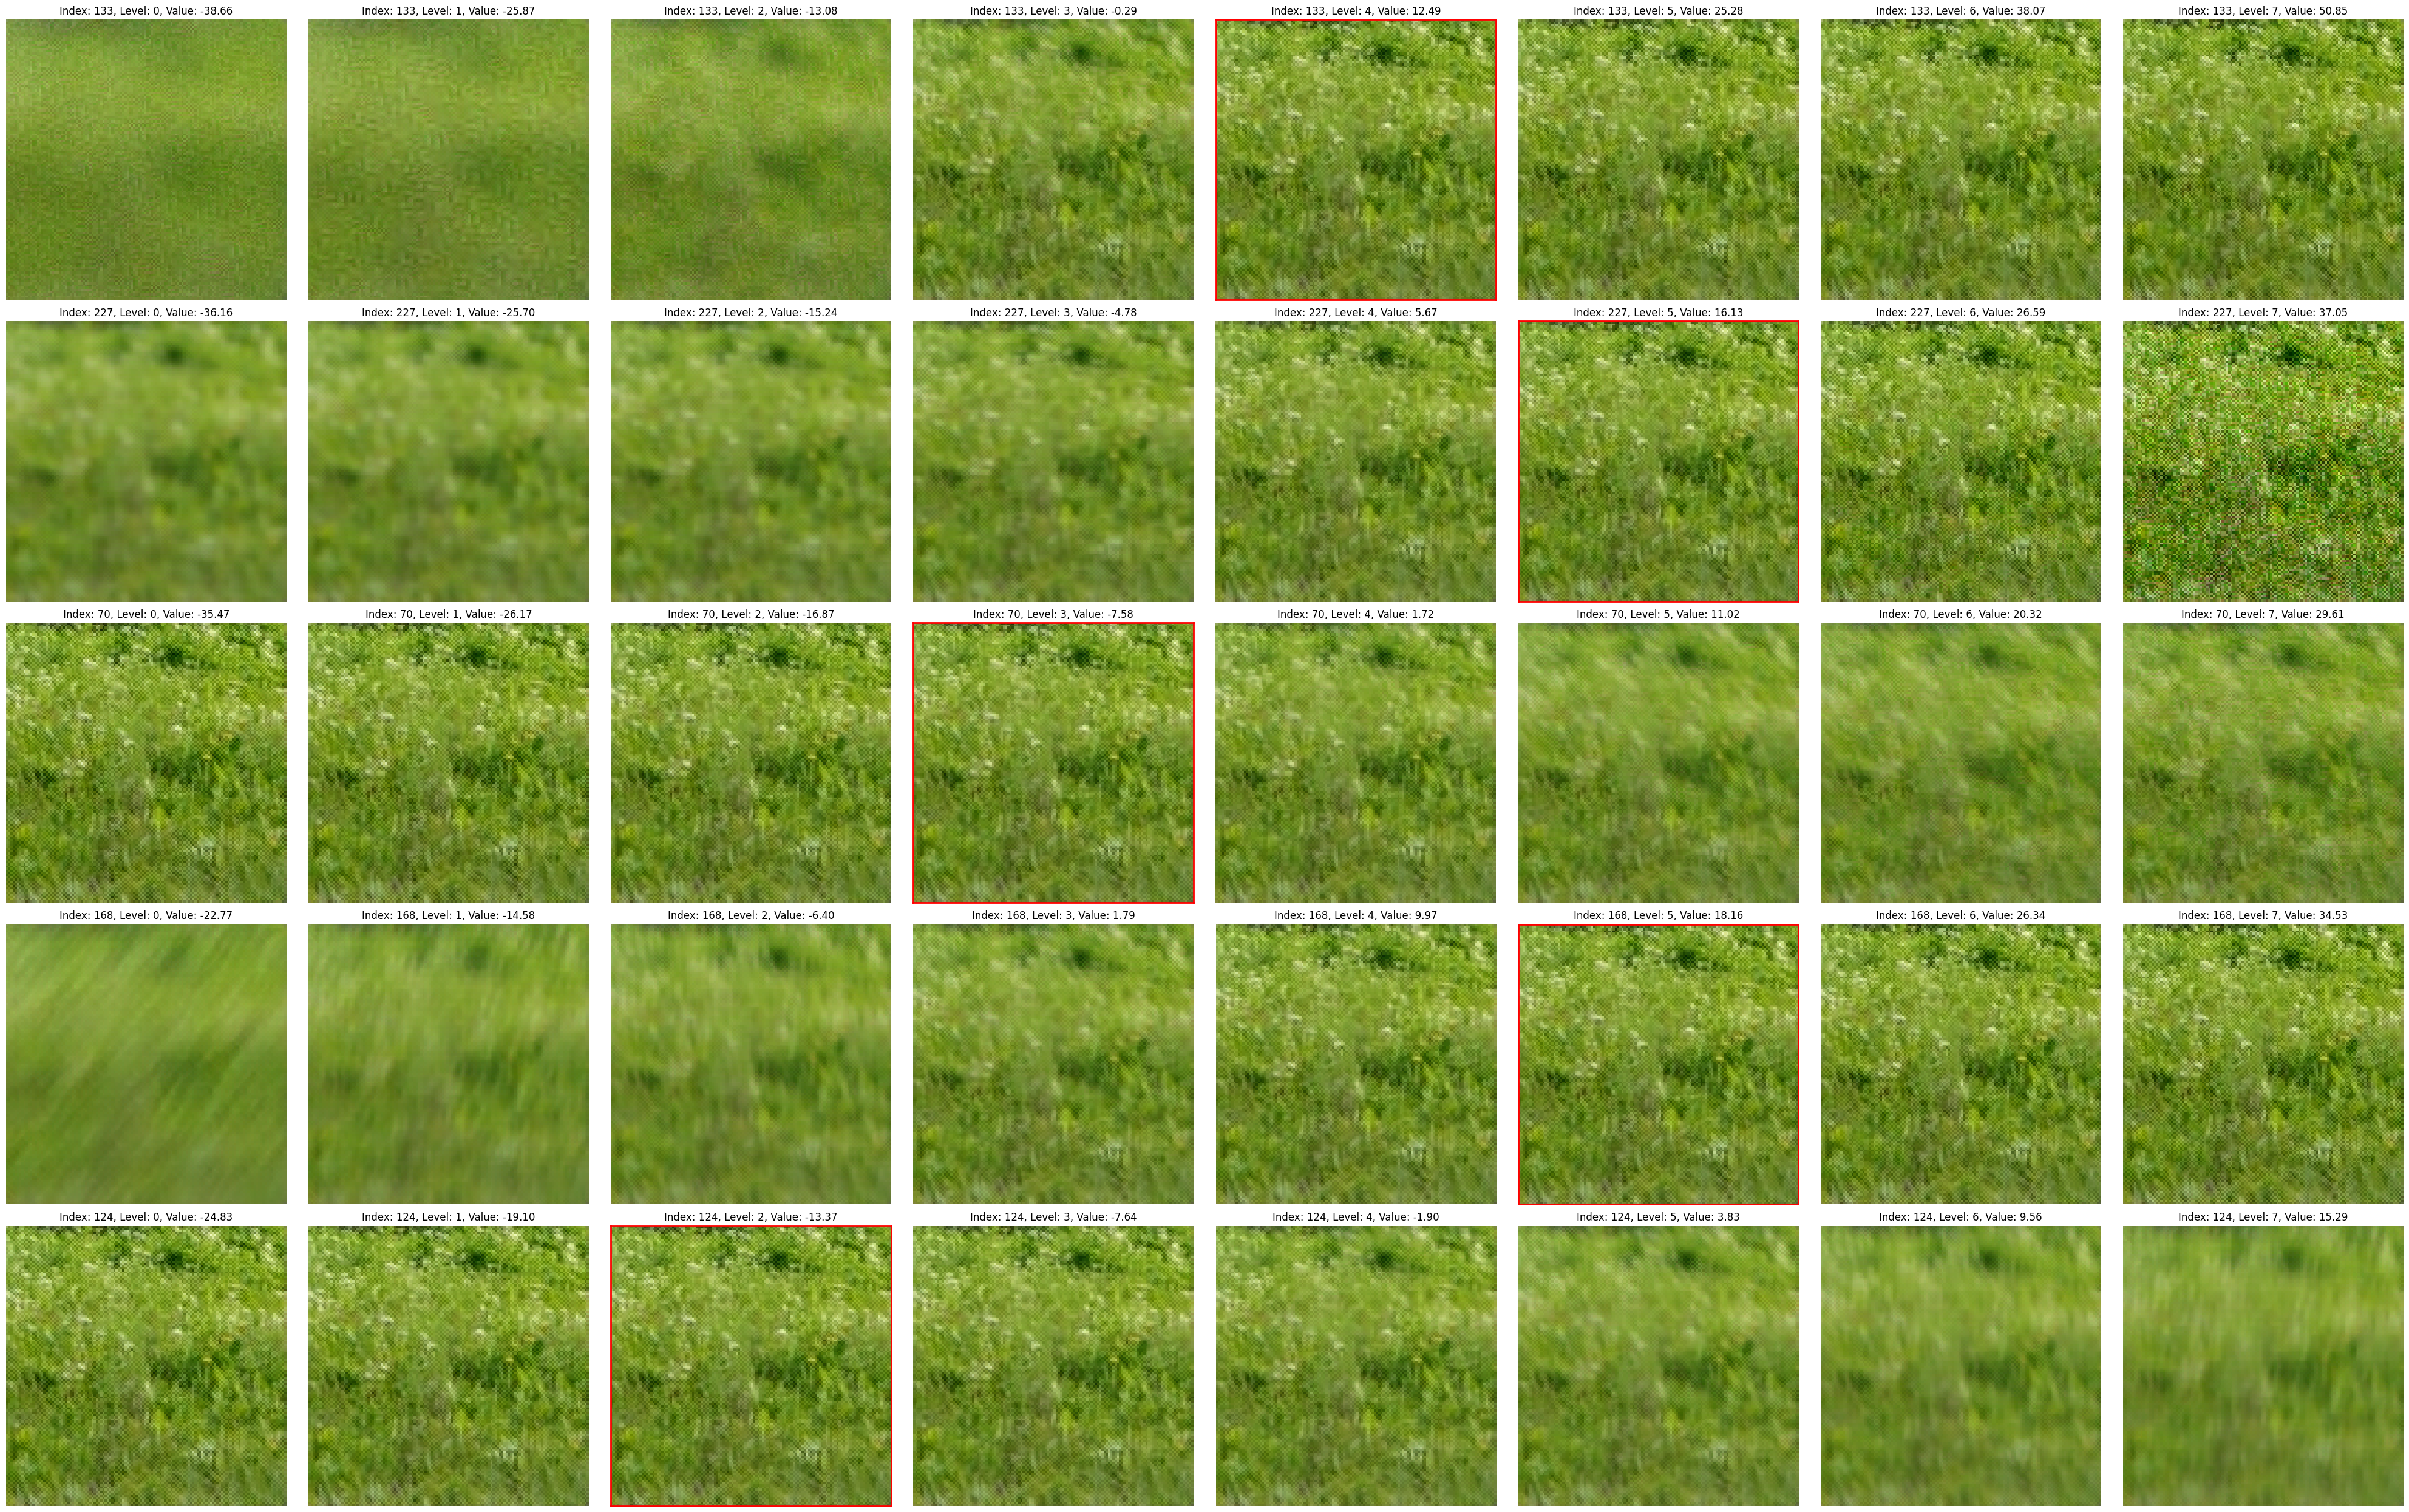

In [20]:
VARIED_IDX = sorted_indices[:5]
NUM_LEVELS = 8  # Number of levels to vary each index
MIN, MAX = -10, 10

# Store the original embeddings

# Create a figure with subplots arranged in 3 rows and NUM_LEVELS columns
fig, axs = plt.subplots(len(VARIED_IDX), NUM_LEVELS, figsize=(NUM_LEVELS * 5, len(VARIED_IDX) * 5))
# original_embeddings = eg.clone()    # Starting from distorted
original_embeddings = eg_pristine.clone()    # Starting from distorted



# original_embeddings = model.forward_latent(y_0, COMPRESS_G).detach().clone()# Starting from pristine
# _, original_embeddings = get_emb(t.gt)        # Starting from pristine

with torch.no_grad():
    # Loop over each index to vary
    for idx, varied_idx in enumerate(VARIED_IDX):
        # Get the range of values to assign to the current index
        # varied_values = torch.linspace(MIN, MAX, steps=NUM_LEVELS)
        # idx_in_list = sorted)
        std = math.sqrt(vars[varied_idx])
        mean_v = mean_values[varied_idx]
        varied_values = torch.linspace(mean_v - 4 * std, mean_v + 4 * std, steps=NUM_LEVELS)

        closest_level = None
        min_distance = float('inf')
        
        # Loop over each level
        for level, value in enumerate(varied_values):
            # Assign the varied value to the specified index of the embedding
            modified_embeddings = original_embeddings.clone()
            modified_embeddings[0, varied_idx] = value
            
            # Calculate the distance from the original value
            distance = abs(original_embeddings[0, varied_idx] - value)
            if distance < min_distance:
                min_distance = distance
                closest_level = level
            
            # Generate the image with the modified embedding
            gen_img = forward_gen(x_0, modified_embeddings, el)
            
            # Display the generated image in the corresponding subplot
            axs[idx, level].imshow((gen_img.squeeze().permute(1, 2, 0).cpu().numpy() * 0.5) + 0.5)
            axs[idx, level].set_title(f'Index: {varied_idx}, Level: {level}, Value: {value:.2f}')
            axs[idx, level].axis('off')  # Hide the axis
        
        # Highlight the subplot with the closest level to the original
        axs[idx, closest_level].axis('on')  
        axs[idx, closest_level].set_xticks([])
        axs[idx, closest_level].set_yticks([])
        for spine in ['top', 'bottom', 'left', 'right']:
            axs[idx, closest_level].spines[spine].set_visible(True)
            axs[idx, closest_level].spines[spine].set_color('red')
            axs[idx, closest_level].spines[spine].set_linewidth(2)

    plt.tight_layout()
    plt.show()







## Plot transfer

In [22]:
PLOT_N = 5




For reproducibility, we have selected a few images with different comination of degradations for demonstration.  

In [24]:
import torchvision.transforms.functional as VF

def get_image(img_path: str):
    img = Image.open(img_path).convert('RGB')
    img = VF.center_crop(img, [128, 128])
    img = trainer.loaders['test'].dataset.transform(img)
    return img[:3, :, :]


In [25]:
def load_image_patches(folder_name):
    # Define the path to the images folder
    images_folder = folder_name

    # List all image files in the folder
    image_files = [f for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))]
    image_files.sort()

    # Load each image using the get_image function
    loaded_images = [get_image(os.path.join(images_folder, img_file)) for img_file in image_files]

    return loaded_images

In [26]:
distorted_images = load_image_patches(project_root / 'notebooks' / 'images' / 'wm' / 'dists')
pristine_images = load_image_patches(project_root / 'notebooks' / 'images' / 'wm' / 'pres')

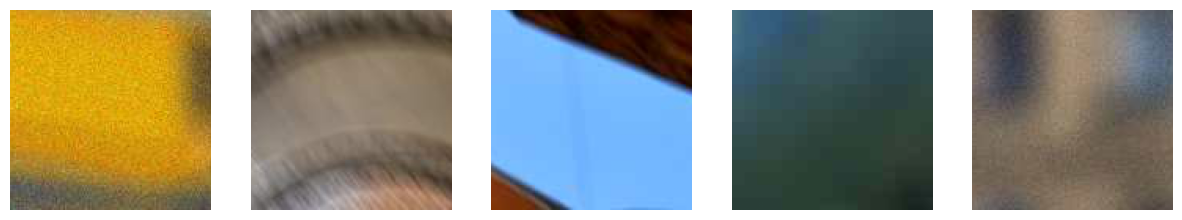

In [27]:

# Create a figure to display the images
fig, axs = plt.subplots(1, len(distorted_images), figsize=(15, 5))

# Display each loaded image
for i, img in enumerate(distorted_images):
    axs[i].imshow((img.cpu().numpy().transpose(1, 2, 0) + 1) / 2)
    axs[i].axis('off')

plt.show()


In [28]:
distorted_images[1].shape

torch.Size([3, 128, 128])

In [29]:
generated_images = []
with torch.no_grad():
    # Loop over each index to vary
    for i, x_0 in enumerate(pristine_images):
        this_images = [ ] 
        x_0 = x_0.unsqueeze(0).cuda() # raw_datas[i]['B_img'].cuda()
        for j, y_0 in enumerate(distorted_images):
            
            y_0 = y_0.unsqueeze(0).cuda()# raw_datas[j]['A_img'][:, 0].cuda()
            eg = forward_latent_modifiable(y_0) # model.forward_latent(y_0, COMPRESS_G)
            el = model.forward_latent_local(y_0, COMPRESS_L)
            y_hat = forward_gen(x_0, eg, el)
            this_images.append(y_hat.detach().cpu())
            del eg, el, y_hat
            print(i, j, len(this_images))
        print(len(this_images))
        generated_images.append(this_images)



0 0 1
0 1 2
0 2 3
0 3 4
0 4 5
5
1 0 1
1 1 2
1 2 3
1 3 4
1 4 5
5
2 0 1
2 1 2
2 2 3
2 3 4
2 4 5
5
3 0 1
3 1 2
3 2 3
3 3 4
3 4 5
5
4 0 1
4 1 2
4 2 3
4 3 4
4 4 5
5


In [30]:
raw_datas[0]['B_img'].shape

NameError: name 'raw_datas' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


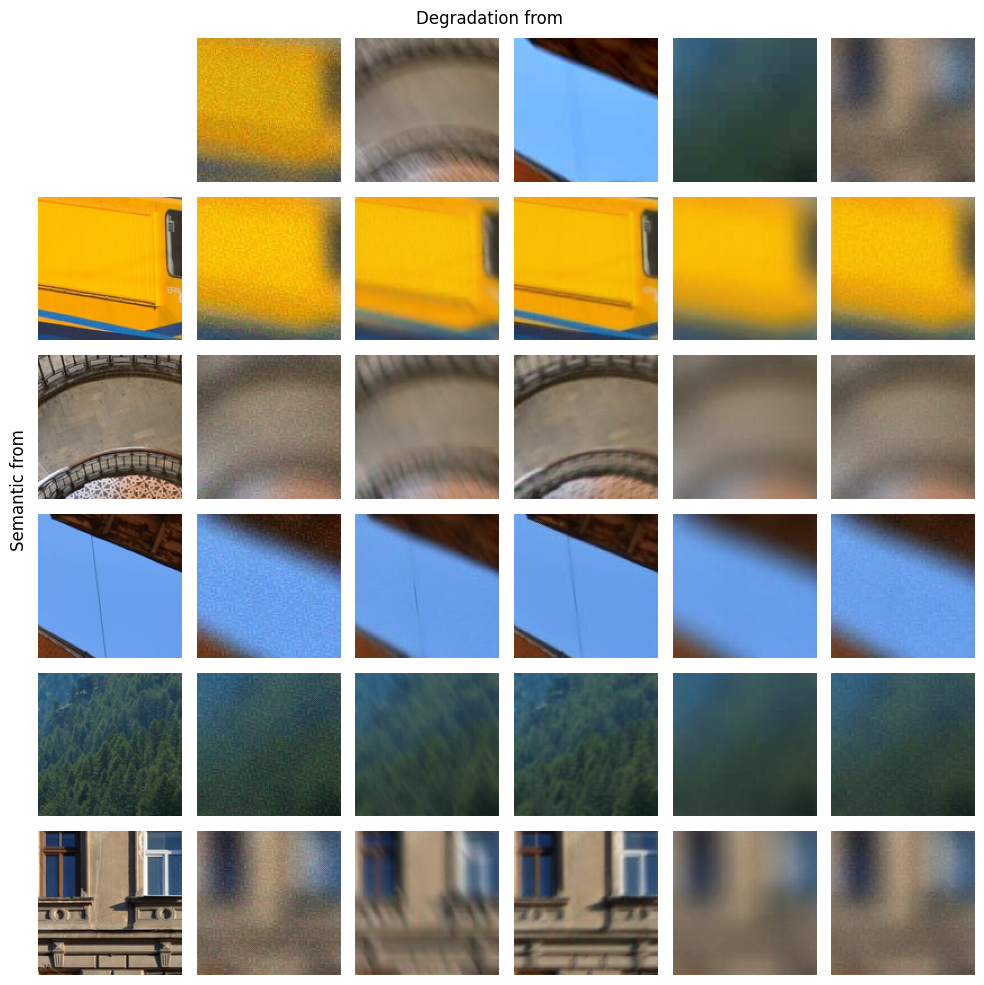

In [31]:
fig, axs = plt.subplots(len(pristine_images) + 1, len(distorted_images) + 1, figsize=(10, 10))

axs[0, 0].axis('off')

# Plot x_0 images in the 0th column
for i, x_0 in enumerate(pristine_images):
    x_0_img = x_0.cpu().numpy().transpose(1, 2, 0)
    x_0_img = (x_0_img + 1) / 2  # Scale from [-1, 1] to [0, 1]
    axs[i + 1, 0].imshow(x_0_img)
    axs[i + 1, 0].axis('off')

# Plot y_0 images in the 0th row
for j, y_0 in enumerate(distorted_images):
    y_0_img = y_0.cpu().numpy().transpose(1, 2, 0)
    y_0_img = (y_0_img + 1) / 2  # Scale from [-1, 1] to [0, 1]
    axs[0, j + 1].imshow(y_0_img)
    axs[0, j + 1].axis('off')

# Plot generated images in the body grids
for i, x_0 in enumerate(pristine_images):
    for j, y_0 in enumerate(distorted_images):
        gen_img = generated_images[i][j][0].numpy().transpose(1, 2, 0)
        gen_img = (gen_img + 1) / 2  # Scale from [-1, 1] to [0, 1]
        axs[i + 1, j + 1].imshow(gen_img)
        axs[i + 1, j + 1].axis('off')
del x_0, y_0

# fig.supxlabel("Degradation from")
fig.supylabel("Semantic from")
fig.suptitle('Degradation from')

plt.tight_layout()
plt.savefig('output_figure_1.pdf', format='pdf')

plt.show()




In [32]:
img_dir = Path('res/transfer/')
img_dir.mkdir(exist_ok=True, parents=True)


for i, x_0 in enumerate(pristine_images):
    save_image(x_0, img_dir / f'x_0_{i}.png')

# Plot y_0 images in the 0th row
for j, y_0 in enumerate(distorted_images):
    save_image(y_0, img_dir / f'y_0_{j}.png')

# Plot generated images in the body grids
for i, x_0 in enumerate(pristine_images):
    for j, y_0 in enumerate(distorted_images):
        gen_img = generated_images[i][j][0]# .numpy().transpose(1, 2, 0)
        save_image(gen_img, img_dir / f'gen_{i}_{j}.png')
del x_0, y_0

In [33]:
SELECTED_PRISTINES = [1, 3]
SELECTED_DISTORTED = [1, 2, 3, 4]
col_width = (100 - 7) / (len(SELECTED_DISTORTED) + 1)

contents = [
    r'''#grid(
  columns: (
    7%, ''',
    f'  {col_width:.1f}% - gutter,\n' * (len(SELECTED_DISTORTED) + 1),
    '''
    ),
  inset: 1.5pt,
  grid.hline(y: 2),
  grid.vline(x: 2),
  ''',
  f'''
  [], [],
  grid.cell(colspan: {len(SELECTED_DISTORTED) })[Source of Degradation], 
  [], 
  bdiagbox(
    width: 130%,
    inset: 7pt, // box_stroke: teal + 3pt
    )[$fb(x)$][$fb(y)$],
'''
]

for i in SELECTED_DISTORTED:
    contents.append(f'  image("transfer/y_0_{i}.png"),')
contents.append(f'  grid.cell(rowspan: {len(SELECTED_PRISTINES)},rotate(-90deg, reflow: true)[Source of Semantics]),')
for j in SELECTED_PRISTINES:
    contents.append(f'  image("transfer/x_0_{j}.png"),')
    for i in SELECTED_DISTORTED:
        contents.append(f'  image("transfer/gen_{j}_{i}.png"),')
contents.append(')')
print('\n'.join(contents))



#grid(
  columns: (
    7%, 
  18.6% - gutter,
  18.6% - gutter,
  18.6% - gutter,
  18.6% - gutter,
  18.6% - gutter,


    ),
  inset: 1.5pt,
  grid.hline(y: 2),
  grid.vline(x: 2),
  

  [], [],
  grid.cell(colspan: 4)[Source of Degradation], 
  [], 
  bdiagbox(
    width: 130%,
    inset: 7pt, // box_stroke: teal + 3pt
    )[$fb(x)$][$fb(y)$],

  image("transfer/y_0_1.png"),
  image("transfer/y_0_2.png"),
  image("transfer/y_0_3.png"),
  image("transfer/y_0_4.png"),
  grid.cell(rowspan: 2,rotate(-90deg, reflow: true)[Source of Semantics]),
  image("transfer/x_0_1.png"),
  image("transfer/gen_1_1.png"),
  image("transfer/gen_1_2.png"),
  image("transfer/gen_1_3.png"),
  image("transfer/gen_1_4.png"),
  image("transfer/x_0_3.png"),
  image("transfer/gen_3_1.png"),
  image("transfer/gen_3_2.png"),
  image("transfer/gen_3_3.png"),
  image("transfer/gen_3_4.png"),
)
